### Credit Card Fraud Detection

##### Problem 

It is important that credit card companies are able to recognize fraudulent credit card transactions so that their customers are not charged for items that they did not purchase.

##### Dataset information

The dataset contains transactions made with credit cards in September 2013 by European cardholders. It contains 284 807 transactions that are either fraud or not fraud. The dataset is highly unbalanced as the positive class(frauds) represents 0.172% of all transactions. It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the original features and more background information about the data are not provided. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, it can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

##### Objective

The purpose of this project is to make several different classification algorithms and compare their results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
%matplotlib inline

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

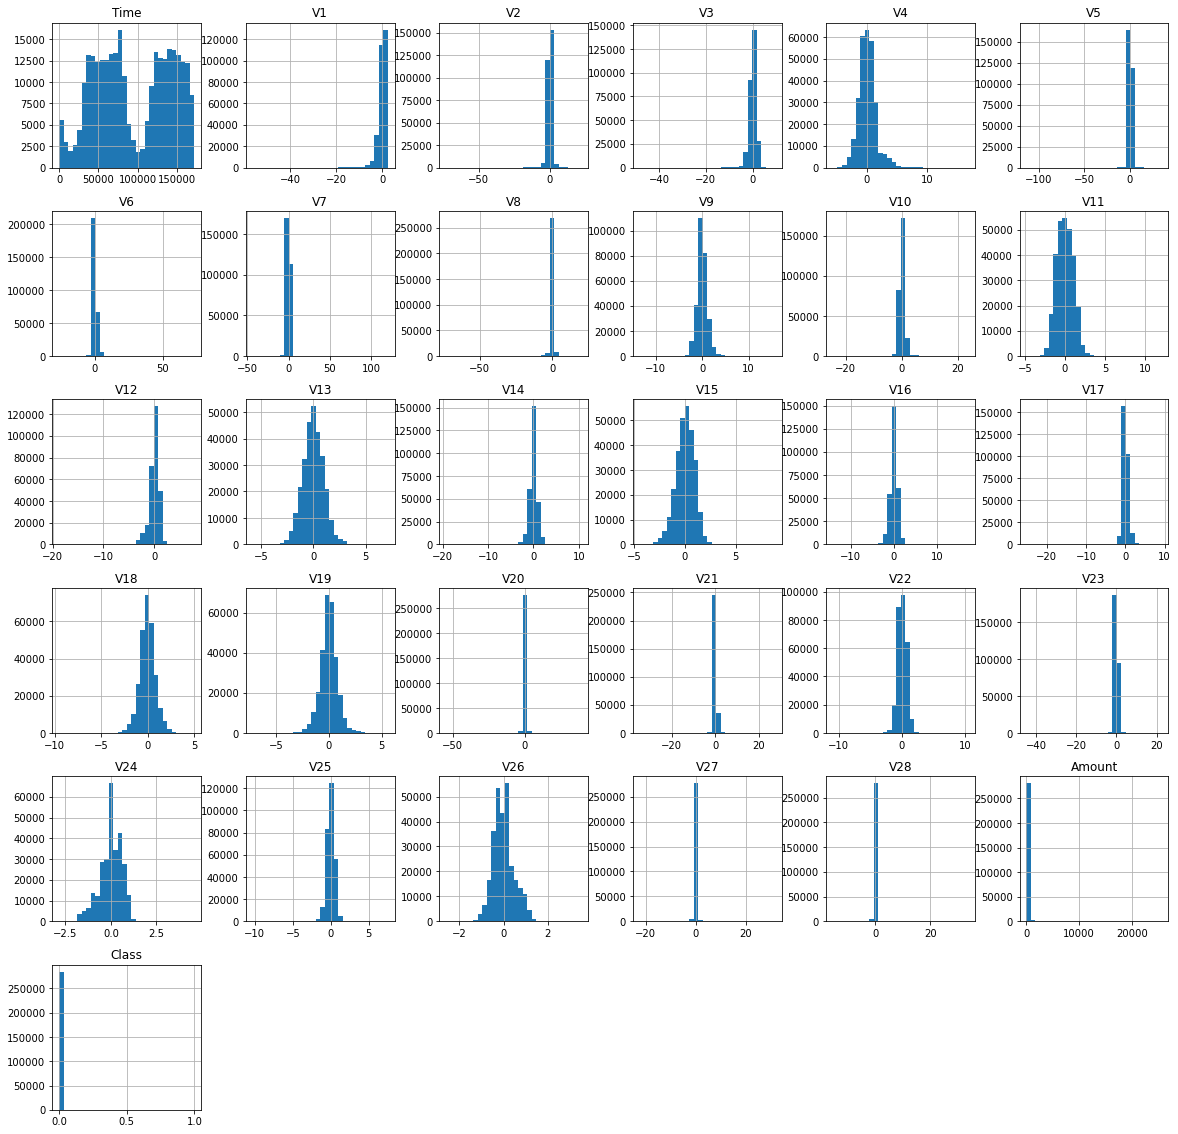

In [6]:
df.hist(bins = 30, figsize = (20,20))
plt.show()

In [7]:
frauds = df.query('Class == 1')
not_frauds = df.query('Class == 0')

In [8]:
credit_card_data = pd.concat([frauds, not_frauds.sample(len(frauds))])

In [9]:
credit_card_data['Amount'] = RobustScaler().fit_transform(credit_card_data['Amount'].to_numpy().reshape(-1, 1))

In [10]:
credit_card_data['Amount'].describe()

count    9.840000e+02
mean     9.598605e-01
std      2.699408e+00
min     -2.162602e-01
25%     -2.001016e-01
50%     -1.805197e-17
75%      7.998984e-01
max      3.592632e+01
Name: Amount, dtype: float64

In [11]:
credit_card_data['Time'] = MinMaxScaler().fit_transform(credit_card_data['Time'].to_numpy().reshape(-1, 1))

In [12]:
credit_card_data['Time']

541       0.001523
623       0.001908
4920      0.025185
6108      0.039910
6329      0.043020
            ...   
79219     0.337094
57503     0.278813
109446    0.415655
70524     0.313647
256568    0.919514
Name: Time, Length: 984, dtype: float64

In [13]:
credit_card_data = credit_card_data.sample(frac = 1, random_state = 1)

In [14]:
credit_card_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
56782,0.276800,-1.409666,-1.031321,-0.224180,-1.571699,1.527970,3.467728,-0.901645,1.465510,0.816140,...,0.417825,0.618091,0.130169,1.041251,0.044384,-0.457272,0.081916,-0.039941,1.426016,0
107637,0.410661,-2.271755,-0.457655,-2.589055,2.230778,-4.278983,0.388610,0.102485,0.813128,-1.092921,...,1.096342,0.658399,1.711676,0.333540,0.538591,-0.193529,0.258194,0.247269,8.166159,1
275992,0.972446,-2.027135,-1.131890,-1.135194,1.086963,-0.010547,0.423797,3.790880,-1.155595,-0.063434,...,-0.315105,0.575520,0.490842,0.756502,-0.142685,-0.602777,0.508712,-0.091646,6.229878,1
44865,0.244859,1.355144,-0.570349,-0.453026,-0.831294,-0.239699,0.115079,-0.701890,0.083354,-0.510820,...,0.001287,-0.176162,-0.175389,-1.436149,0.431716,-0.167838,0.029418,0.034343,0.367073,0
73702,0.321436,1.478097,-1.435780,0.748212,-1.485151,-1.570957,0.619726,-1.729289,0.281582,-1.113681,...,-0.270961,-0.285965,-0.088068,-0.854662,0.349064,-0.139141,0.068147,0.010414,-0.013618,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94609,0.378078,-1.161337,0.976984,0.818160,1.015661,0.016329,-0.960003,0.380380,0.163822,-0.665249,...,0.173232,0.539736,0.195382,0.403891,-0.170206,-0.340665,-0.136415,0.056067,-0.091463,0
15810,0.158142,-25.942434,14.601998,-27.368650,6.378395,-19.104033,-4.684806,-18.261393,17.052566,-3.742605,...,1.784316,-1.917759,-1.235787,0.161105,1.820378,-0.219359,1.388786,0.406810,0.799898,1
71621,0.316343,0.312491,-1.846965,0.579451,0.545438,-0.919222,1.769455,-0.650890,0.706145,1.480694,...,0.086260,-0.279597,-0.093654,-0.941985,-0.342995,0.809285,-0.029080,0.061115,3.555081,0
107067,0.409109,-1.512516,1.133139,-1.601052,2.813401,-2.664503,-0.310371,-1.520895,0.852996,-1.496495,...,0.729828,0.485286,0.567005,0.323586,0.040871,0.825814,0.414482,0.267265,3.016565,1


In [15]:
train, test, val = credit_card_data[:700], credit_card_data[700:850], credit_card_data[850:]
train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()

(1    353
 0    347
 Name: Class, dtype: int64,
 0    79
 1    71
 Name: Class, dtype: int64,
 1    68
 0    66
 Name: Class, dtype: int64)

In [16]:
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
train_np.shape, test_np.shape, val_np.shape

((700, 31), (150, 31), (134, 31))

In [17]:
x_train, y_train = train_np[:, :-1], train_np[:, -1]
x_test, y_test = test_np[:, :-1], test_np[:, -1]
x_val, y_val = val_np[:, :-1], val_np[:, -1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((700, 30), (700,), (150, 30), (150,), (134, 30), (134,))

##### Logistic Regression Model

In [18]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_val)
lr.score(x_val, y_val)

0.9477611940298507

In [19]:
print(confusion_matrix(y_val, y_pred))

[[65  1]
 [ 6 62]]


In [20]:
print(classification_report(y_val, y_pred, target_names = ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.92      0.98      0.95        66
       Fraud       0.98      0.91      0.95        68

    accuracy                           0.95       134
   macro avg       0.95      0.95      0.95       134
weighted avg       0.95      0.95      0.95       134



##### Support Vector Classifier

In [21]:
svc = SVC(probability=True)
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_val)
print(classification_report(y_val, svc_pred, target_names = ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.89      1.00      0.94        66
       Fraud       1.00      0.88      0.94        68

    accuracy                           0.94       134
   macro avg       0.95      0.94      0.94       134
weighted avg       0.95      0.94      0.94       134



##### RandomForestClassifier

In [22]:
rfc = RandomForestClassifier(criterion = 'gini', max_depth = 2, n_jobs = -1, n_estimators = 20)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=20, n_jobs=-1)

In [23]:
rfc_pred = rfc.predict(x_val)
print(classification_report(y_val, rfc_pred, target_names = ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.86      1.00      0.92        66
       Fraud       1.00      0.84      0.91        68

    accuracy                           0.92       134
   macro avg       0.93      0.92      0.92       134
weighted avg       0.93      0.92      0.92       134



##### Gradient Boosting Classifier

In [24]:
gbc = GradientBoostingClassifier(n_estimators = 20, learning_rate = 1.0, max_depth = 2, random_state = 1)
gbc.fit(x_train, y_train)
gbc_pred = gbc.predict(x_val)
print(classification_report(y_val, gbc_pred, target_names = ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.90      0.92      0.91        66
       Fraud       0.92      0.90      0.91        68

    accuracy                           0.91       134
   macro avg       0.91      0.91      0.91       134
weighted avg       0.91      0.91      0.91       134



##### K-Nearest Neighbors Classifier

In [25]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_val)
print(classification_report(y_val, knn_pred, target_names = ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.90      0.95      0.93        66
       Fraud       0.95      0.90      0.92        68

    accuracy                           0.93       134
   macro avg       0.93      0.93      0.93       134
weighted avg       0.93      0.93      0.93       134



##### Shallow Neural Network

In [26]:
shallow_nn = Sequential()
shallow_nn.add(InputLayer((x_train.shape[1],)))
shallow_nn.add(Dense(2, 'relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn', save_best_only = True)

shallow_nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
shallow_nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 62        
_________________________________________________________________
batch_normalization (BatchNo (None, 2)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 73
Trainable params: 69
Non-trainable params: 4
_________________________________________________________________


In [27]:
shallow_nn.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 5, callbacks = checkpoint)

Epoch 1/5
22/22 [==============================] - 1s 12ms/step - loss: 0.7849 - accuracy: 0.4543 - val_loss: 0.6238 - val_accuracy: 0.6642
INFO:tensorflow:Assets written to: shallow_nn\assets
Epoch 2/5
22/22 [==============================] - 0s 3ms/step - loss: 0.6666 - accuracy: 0.6100 - val_loss: 0.5557 - val_accuracy: 0.7164
INFO:tensorflow:Assets written to: shallow_nn\assets
Epoch 3/5
22/22 [==============================] - 0s 3ms/step - loss: 0.5974 - accuracy: 0.6829 - val_loss: 0.5229 - val_accuracy: 0.7612
INFO:tensorflow:Assets written to: shallow_nn\assets
Epoch 4/5
22/22 [==============================] - 0s 2ms/step - loss: 0.5429 - accuracy: 0.7529 - val_loss: 0.4934 - val_accuracy: 0.7910
INFO:tensorflow:Assets written to: shallow_nn\assets
Epoch 5/5
22/22 [==============================] - 0s 3ms/step - loss: 0.5130 - accuracy: 0.8086 - val_loss: 0.4700 - val_accuracy: 0.8507
INFO:tensorflow:Assets written to: shallow_nn\assets


In [28]:
def neural_net_predictions(model, x):
    return (model.predict(x).flatten() > 0.5).astype(int)
neural_net_predictions(shallow_nn, x_val)

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1])

In [29]:
print(classification_report(y_val, neural_net_predictions(shallow_nn, x_val)))

              precision    recall  f1-score   support

         0.0       0.88      0.80      0.84        66
         1.0       0.82      0.90      0.86        68

    accuracy                           0.85       134
   macro avg       0.85      0.85      0.85       134
weighted avg       0.85      0.85      0.85       134



### Classification Report and Summary

In [30]:
lr_pred_prob = lr.predict_proba(x_test)
svc_pred_prob = svc.predict_proba(x_test)
rfc_pred_prob = rfc.predict_proba(x_test)
gbc_pred_prob = gbc.predict_proba(x_test)
knn_pred_prob = knn.predict_proba(x_test)

In [31]:
lr_fpr, lr_tpr, lr_thresh = roc_curve(y_test, lr_pred_prob[:,1], pos_label=1)
knn_fpr, knn_tpr, knn_thresh = roc_curve(y_test, knn_pred_prob[:,1], pos_label=1)
svc_fpr, svc_tpr, svc_thresh = roc_curve(y_test, svc_pred_prob[:,1], pos_label=1)
gbc_fpr, gbc_tpr, gbc_thresh = roc_curve(y_test, gbc_pred_prob[:,1], pos_label=1)
rfc_fpr, rfc_tpr, rfc_thresh = roc_curve(y_test, rfc_pred_prob[:,1], pos_label=1)

In [32]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

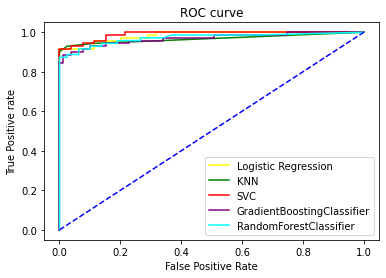

In [33]:
plt.plot(lr_fpr, lr_tpr, linestyle='-',color='yellow', label='Logistic Regression')
plt.plot(knn_fpr, knn_tpr, linestyle='-',color='green', label='KNN')
plt.plot(svc_fpr, svc_tpr, linestyle='-',color='red', label='SVC')
plt.plot(gbc_fpr, gbc_tpr, linestyle='-',color='purple', label='GradientBoostingClassifier')
plt.plot(rfc_fpr, rfc_tpr, linestyle='-',color='cyan', label='RandomForestClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

plt.show()

Algorithm     | F1  | Precision | Recall |
------------- | --------- | ------    | -----  |
LR            | 95        | 92        | 98     |
KNN           | 94      | 97        | 91     |
SVM           | 93      | 98       | 88     |
GBC           | 91        | 92        | 90     |
RFC           | 92        | 98        | 87     |